In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [150]:
df = pd.read_csv('height-weight.csv')

In [151]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


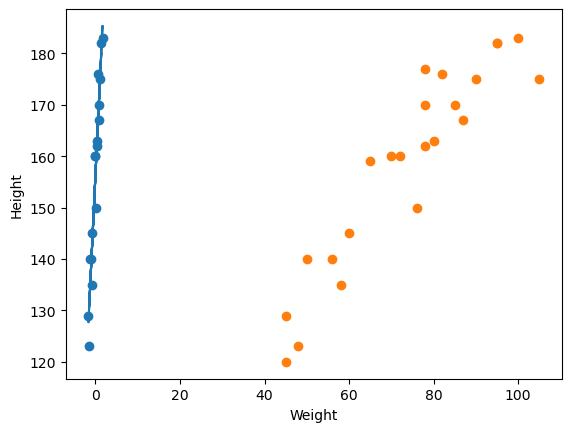

In [152]:
##scatter plots
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [153]:
### correlation
df.corr() ## pearson correlation shift+tab

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


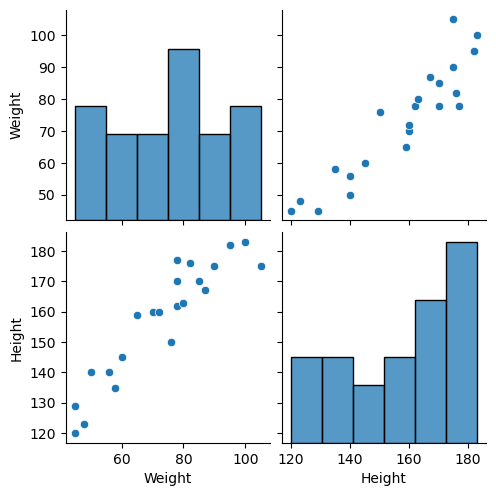

In [154]:
## seaborn for visualisation
import seaborn as sns
sns.pairplot(df)
plt.show()

In [155]:
x = df[['Weight']] # independent feature should be 
#x
np.array(x).shape

(23, 1)

In [156]:
x_series = df['Weight']
np.array(x_series)

array([ 45,  58,  48,  60,  70,  78,  80,  90,  95,  78,  82,  95, 105,
       100,  85,  78,  50,  65,  76,  87,  45,  56,  72], dtype=int64)

In [157]:
# dependent feature can be in series or 1d array i.e shape (23,) columns not mentioned in shape 
import numpy as np
y = df['Height']
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [158]:
## Train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [159]:
##standardization
#for train data "fit_transform" for test data only "transform" because same mean and standard deviation on dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [160]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [161]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1) ## coeff , intercept outputs

In [162]:
regression.fit(x_train,y_train) 

LinearRegression(n_jobs=-1)

In [163]:
print(regression.intercept_)

156.47058823529412


In [164]:
print(regression.coef_)

[17.2982057]


In [166]:
## Plot training data plot best fit line


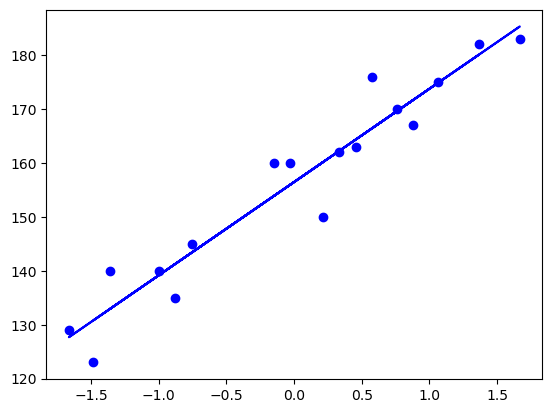

In [172]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regression.predict(x_train),color='blue')
plt.show()

In [173]:
y_pred = regression.predict(x_test)

In [175]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R-Square = 1 - SSR/SST

In [180]:
from sklearn.metrics import r2_score

In [185]:
score = r2_score(y_test,y_pred)

In [186]:
print(score)

0.7360826717981276


In [187]:
## adjusted Rsquare
print( 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1) )

0.6701033397476595


In [188]:
## OLS linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [189]:
prediction = model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [190]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 29 May 2025   Prob (F-statistic):                       0.664
Time:                        22:26:17   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

E:\Anacondaa\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
